In [1]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
with open('Disease.txt', 'r') as f:
    file = f.readlines()
    text = "".join(file)












[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sharbadeepa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
ner = nlp.get_pipe('ner')
print(nlp.pipe_names)




['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


[(('world', 'health', 'organization'), 7), (('wikipedia', 'free', 'encyclopedia'), 7), (('heterophile', 'antibody', 'test'), 7), (('references', 'external', 'links'), 5), (('upper', 'respiratory', 'tract'), 5), (('headaches', 'primary', 'headaches'), 5), (('neuroimaging', 'lumbar', 'puncture'), 5), (('head', 'without', 'contrast'), 5), (('dna', 'repair', 'genes'), 5), (('expression', 'dna', 'repair'), 5)]


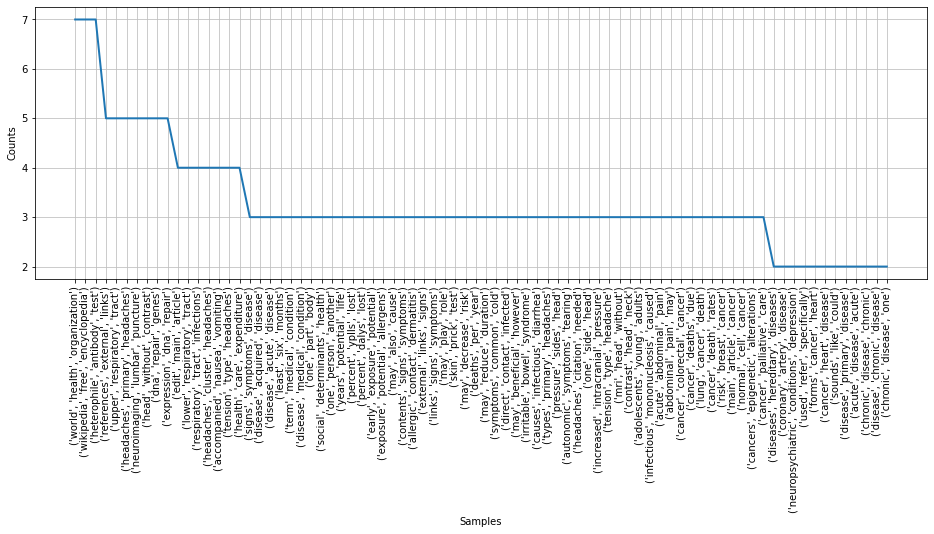

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')
import string
from nltk.util import ngrams
import matplotlib.pyplot as plt
from nltk import FreqDist



punctuations = string.punctuation



stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize

string_1 = text.lower()
word_tokens = word_tokenize(string_1) # tokenize the words
filtered_sentence = []
for word in word_tokens:
    if word not in punctuations and word not in stop_words:
        if word.isalpha():
            filtered_sentence.append(word)
            
        
        
    

ngrams_all = list(ngrams(filtered_sentence, 3))
# print(ngrams_all)

all_words = nltk.FreqDist(ngrams_all)
testing_text = all_words.most_common(10)
print(testing_text)

plt.figure(figsize=(16,5))
all_words.plot(80)


# Using Regex finding out the index of the diseases

In [16]:
# print(str(testing_text))
import spacy
from spacy import displacy
import re
string_text = text
# print(string_text)
import requests
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.util import ngrams
import nltk
import string

url_link = 'https://www.nhs.uk/conditions/'

request = requests.get(url_link)
Soup = BeautifulSoup(request.text, 'lxml')
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation


diseases = []
heading_tags = ["a"]
for tags in Soup.find_all(heading_tags):
    diseases.append(tags.text.strip())
diseases = set(diseases) 
diseases = list(diseases)




# stop_words = set(stopwords.words('english'))
# word_tokens_1 = nltk.word_tokenize(string_text)# tokenize the words
# word_tokens = " ".join(word_tokens_1)
# filtered_sentence = [word for word in word_tokens_1 if word not in stop_words and word not in punctuations and 
#                      word.isalpha()]
# bow = nltk.pos_tag(filtered_sentence)
# string_1 = list(ngrams(filtered_sentence, 7))





Train_data=[]
for disease in diseases:
    if len(disease) > 3:
        match = re.search(disease,string_text)
        if match:
            match_dis = [match.start(), match.end(),'DISEASES']
            Train_data.append(tuple(match_dis))

print(Train_data)
Train_data = [(string_text, {'entities':Train_data})]
print(string_text[29788:29810])


for _,tags in Train_data:
    for ent in tags.get('entities'):
        ner.add_label(ent[2])
        



[(29788, 29810, 'DISEASES'), (66898, 66904, 'DISEASES'), (141305, 141312, 'DISEASES'), (135236, 135254, 'DISEASES'), (73246, 73257, 'DISEASES'), (36518, 36527, 'DISEASES'), (29936, 29942, 'DISEASES'), (143724, 143739, 'DISEASES'), (244042, 244057, 'DISEASES'), (73652, 73657, 'DISEASES'), (12857, 12872, 'DISEASES'), (113542, 113549, 'DISEASES'), (67261, 67274, 'DISEASES'), (38071, 38082, 'DISEASES'), (29992, 29999, 'DISEASES'), (187979, 187991, 'DISEASES'), (22025, 22040, 'DISEASES'), (30470, 30478, 'DISEASES'), (193677, 193688, 'DISEASES'), (219455, 219460, 'DISEASES'), (52504, 52519, 'DISEASES'), (97083, 97092, 'DISEASES'), (116864, 116868, 'DISEASES'), (138003, 138014, 'DISEASES'), (123673, 123690, 'DISEASES'), (123646, 123668, 'DISEASES'), (122591, 122600, 'DISEASES'), (66794, 66811, 'DISEASES'), (175732, 175744, 'DISEASES'), (86818, 86832, 'DISEASES'), (74148, 74154, 'DISEASES'), (178266, 178275, 'DISEASES'), (156834, 156849, 'DISEASES'), (97156, 97182, 'DISEASES'), (9, 17, 'DISEAS

# Using Displacy for the visuvalisation

In [17]:
import random
from spacy.util import minibatch,compounding
from spacy.training import Example
from spacy.tokens import Span


In [18]:
pipe_exceptions = ['ner', 'trf_wordpiecer', 'tfg_tok2vec']
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
print(unaffected_pipes)


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']


In [19]:
 with nlp.disable_pipes(*unaffected_pipes):
        sizes = compounding(1.0, 4.0, 1.001)
        for itn in range(100):

            random.shuffle(Train_data)
            batches = minibatch(Train_data, size=sizes)
            losses = {}

            for batch in batches:
                for text,annotations in batch:
                    doc = nlp.make_doc(text)
                    example = Example.from_dict(doc, annotations)
                    
                    nlp.update([example], drop=0.5, losses=losses)
                    print("losses", losses)



/home/sharbadeepa/notebook/jupyterenv/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Scanning Migraine micrograph of Mycobacterium tube..." with entities "[(29788, 29810, 'DISEASES'), (66898, 66904, 'DISEA...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 3511.456340789795}
losses {'ner': 2990.899139404297}
losses {'ner': 1503.061627149582}
losses {'ner': 857.3610715866089}
losses {'ner': 581.1889228820801}
losses {'ner': 401.2271323800087}
losses {'ner': 236.87840492418036}
losses {'ner': 249.53528249263763}
losses {'ner': 313.87925016880035}
losses {'ner': 99.94551949608649}
losses {'ner': 92.0279674111298}
losses {'ner': 82.5069668113938}
losses {'ner': 80.0038881210487}
losses {'ner': 75.66634239756968}
losses {'ner': 74.8900442587942}
losses {'ner': 69.63219255106014}
losses {'ner': 74.13060566631611}
losses {'ner': 68.77589986669773}
losses {'ner': 73.30277563247364}
losses {'ner': 71.63365359936142}
losses {'ner': 68.59122764191125}
losses {'ner': 67.85959808109328}
losses {'ner': 70.37891027261503}
losses {'ner': 67.4073953582556}
losses {'ner': 67.50808469811454}
losses {'ner': 67.5240554199845}
losses {'ner': 67.72601057015709}
losses {'ner': 67.21972603224276}
losses {'ner': 66.88062856715987}
losses {'ner': 68

In [ ]:
doc = nlp('spread cancer locations body dispersed tumors called dealiest diseases')
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])